In [21]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
suv = pd.read_csv("Social_Network_Ads.csv")
suv.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
suv.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
suv["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

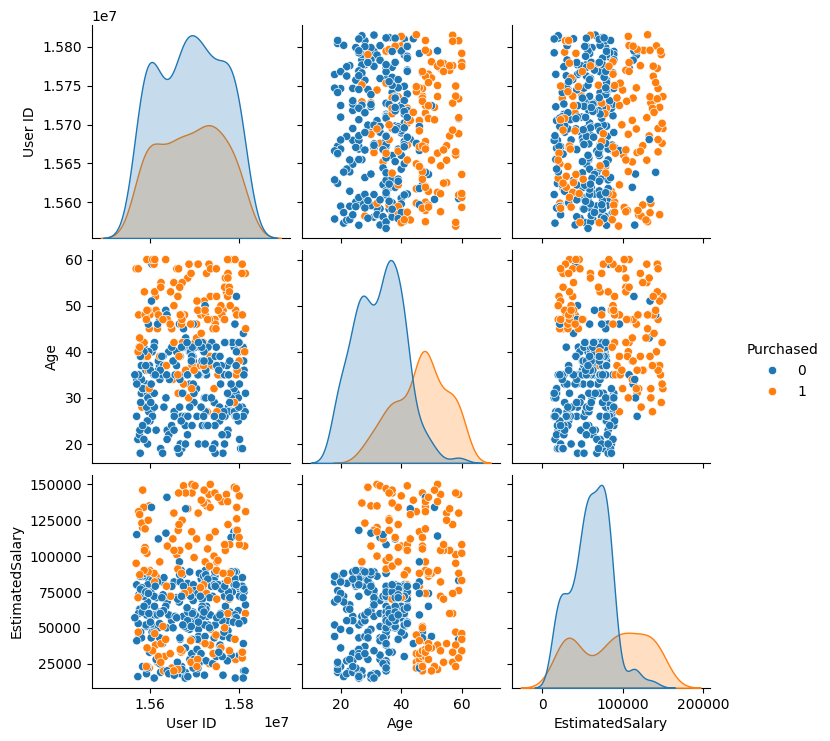

In [12]:
sns.pairplot(suv, hue="Purchased")
plt.show()

In [17]:
if 'Gender' in suv.columns:
    le = LabelEncoder()
    suv['Gender'] = le.fit_transform(suv['Gender'])
suv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [19]:
x = suv[['Age','EstimatedSalary','Gender']]
y = suv['Purchased']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42, stratify = y)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
suv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

0.85

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  6],
       [12, 31]])

In [31]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.92      0.89        77\n           1       0.84      0.72      0.78        43\n\n    accuracy                           0.85       120\n   macro avg       0.85      0.82      0.83       120\nweighted avg       0.85      0.85      0.85       120\n'

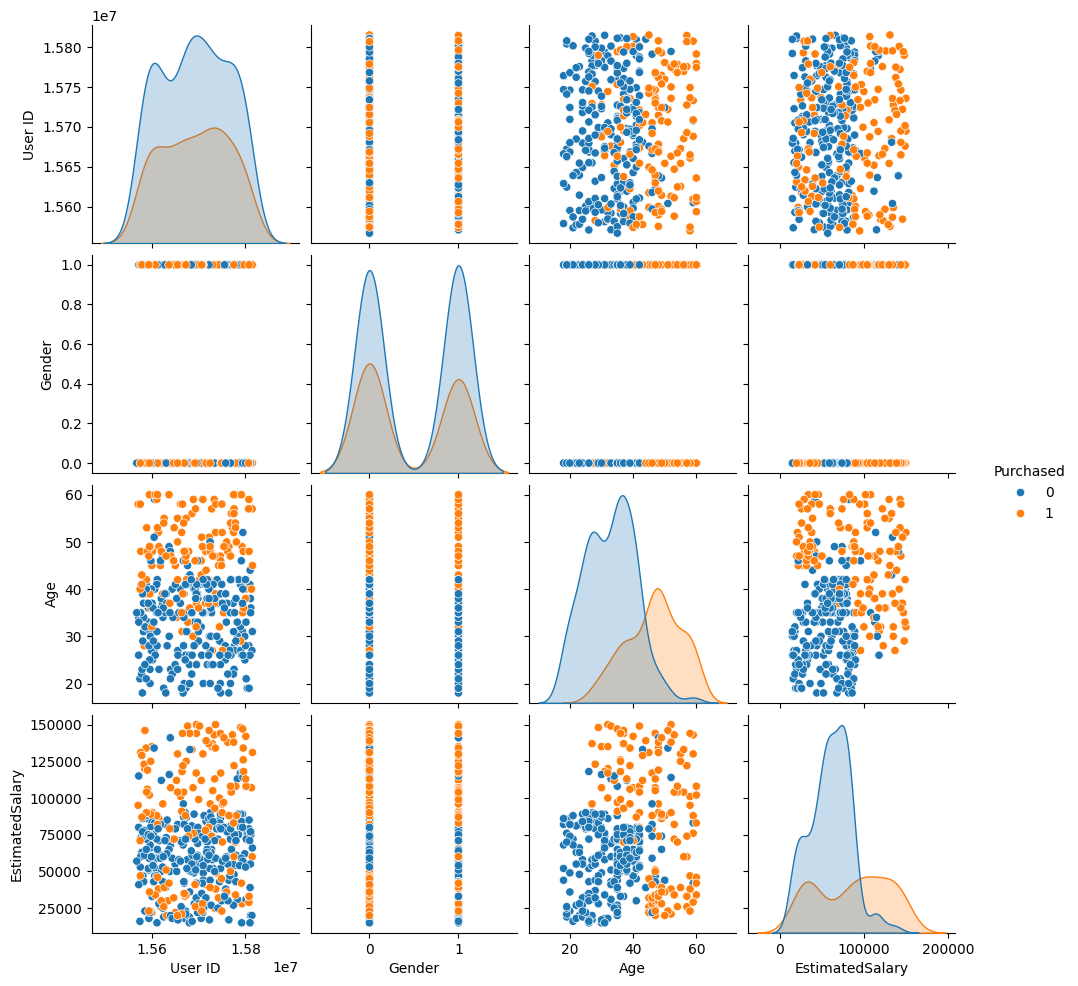

In [32]:
sns.pairplot(suv, hue='Purchased')